Oasis

V.L.Swathika

Data science Internship

Task 3

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, 
horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in 
machine learning. 

Aim is to build model for car price prediction

Kaggle : https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (3)\car data.csv")
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [38]:
df.shape

(301, 9)

In [39]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
df.describe(exclude=np.number)

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [41]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
cat=df.select_dtypes(exclude=np.number)
num=df.select_dtypes(include=np.number)

In [44]:
cat.columns

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [45]:
num.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

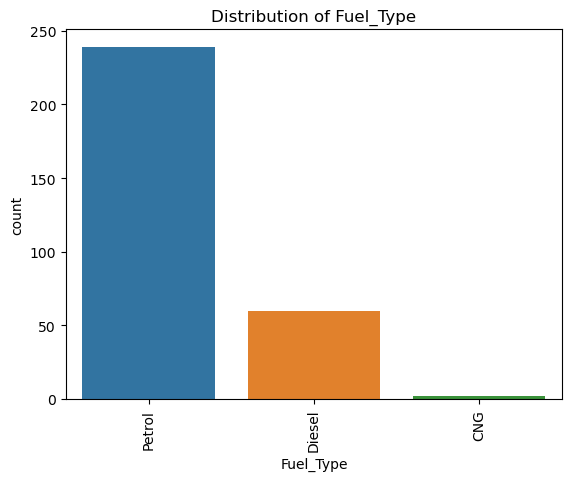

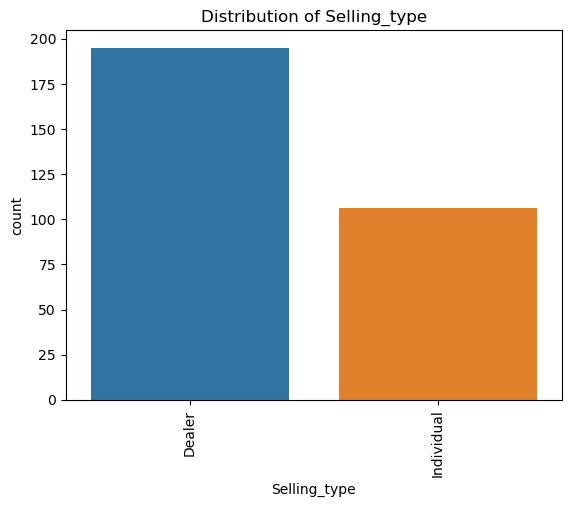

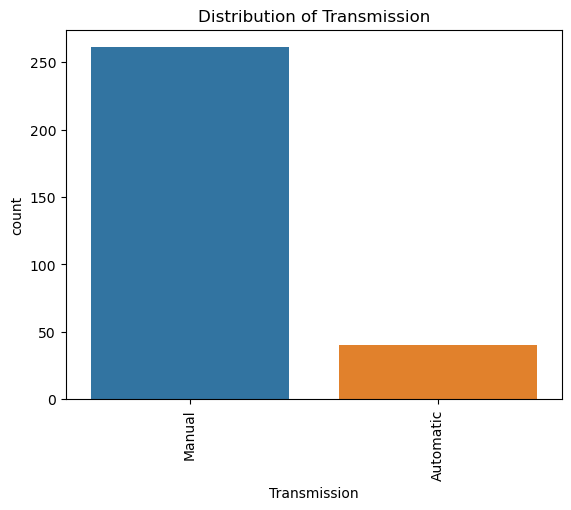

In [46]:
#Univariate
cat.drop('Car_Name',axis=1,inplace=True)
for col in cat.columns:
        sns.countplot(x=col, data=cat)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
        plt.show()  

In [47]:
for car_name in df['Car_Name'].unique():
    counts = df[df['Car_Name'] == car_name]['Car_Name'].count()
    print(f"{car_name}: {counts}")

ritz: 4
sx4: 6
ciaz: 9
wagon r: 4
swift: 5
vitara brezza: 1
s cross: 1
alto 800: 1
ertiga: 6
dzire: 4
alto k10: 5
ignis: 1
800: 1
baleno: 1
omni: 1
fortuner: 11
innova: 9
corolla altis: 16
etios cross: 3
etios g: 3
etios liva: 4
corolla: 1
etios gd: 1
camry: 1
land cruiser: 1
Royal Enfield Thunder 500: 3
UM Renegade Mojave: 1
KTM RC200: 2
Bajaj Dominar 400: 1
Royal Enfield Classic 350: 7
KTM RC390: 1
Hyosung GT250R: 1
Royal Enfield Thunder 350: 4
KTM 390 Duke : 1
Mahindra Mojo XT300: 1
Bajaj Pulsar RS200: 1
Royal Enfield Bullet 350: 1
Royal Enfield Classic 500: 2
Bajaj Avenger 220: 3
Bajaj Avenger 150: 1
Honda CB Hornet 160R: 3
Yamaha FZ S V 2.0: 3
Yamaha FZ 16: 1
TVS Apache RTR 160: 3
Bajaj Pulsar 150: 4
Honda CBR 150: 2
Hero Extreme: 2
Bajaj Avenger 220 dtsi: 2
Bajaj Avenger 150 street: 1
Yamaha FZ  v 2.0: 2
Bajaj Pulsar  NS 200: 1
Bajaj Pulsar 220 F: 2
TVS Apache RTR 180: 2
Hero Passion X pro: 1
Bajaj Pulsar NS 200: 3
Yamaha Fazer : 1
Honda Activa 4G: 2
TVS Sport : 1
Honda Dream Yug

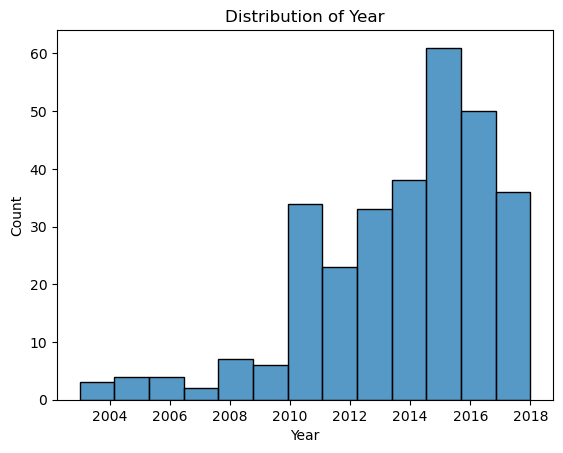

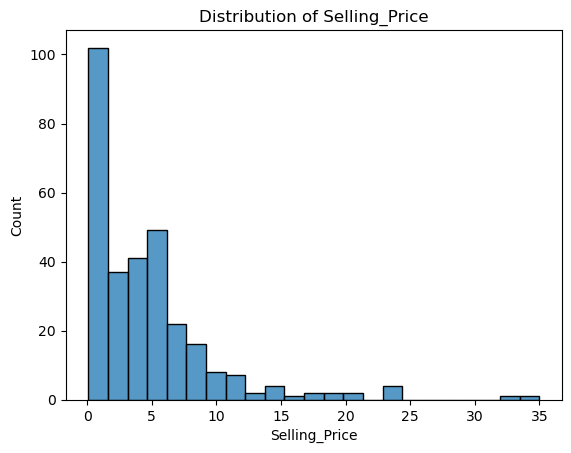

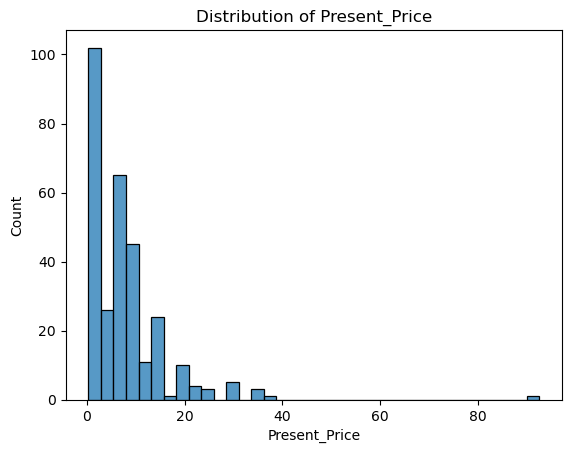

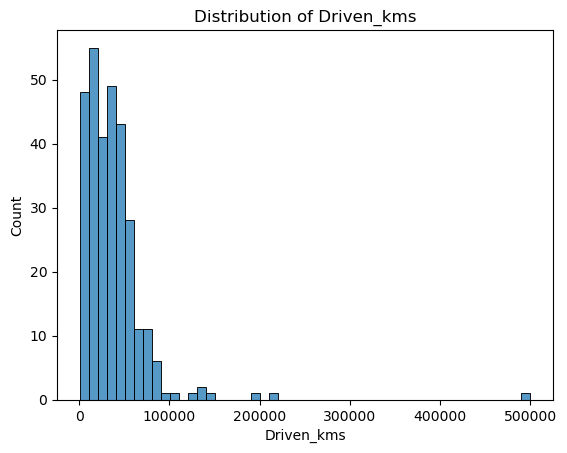

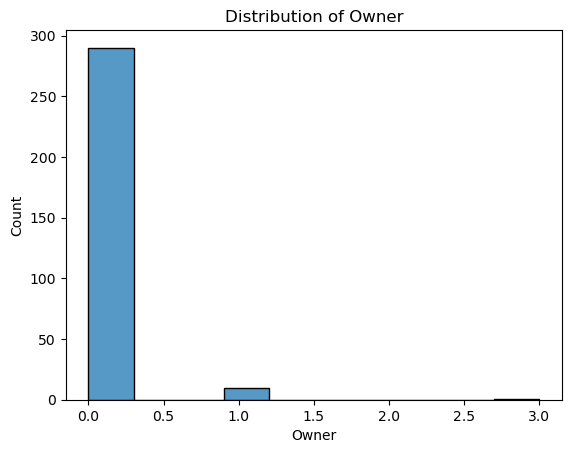

In [48]:
#univariate for numerical
for i in num.columns:
    sns.histplot(x=num[i])
    plt.title(f'Distribution of {i}')
    plt.show()

In [49]:
df['Owner'].value_counts() #This seems to be categoric

0    290
1     10
3      1
Name: Owner, dtype: int64

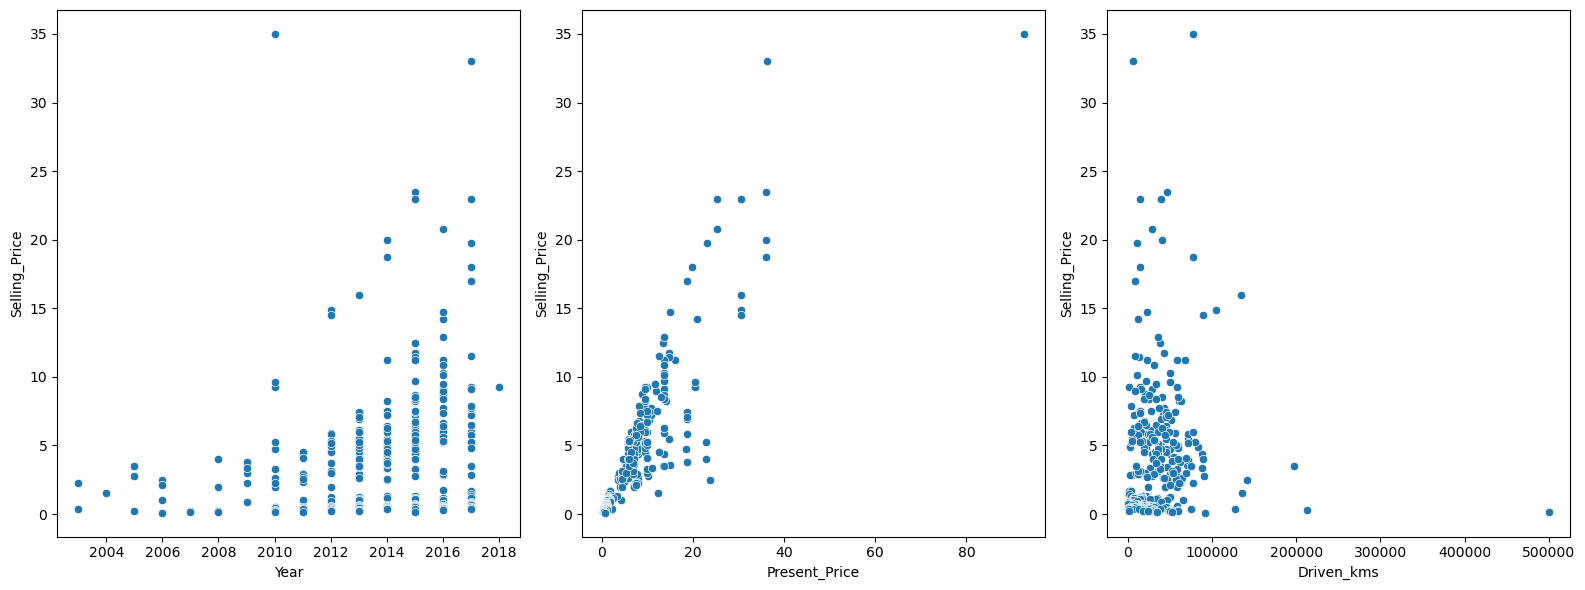

In [50]:
#Bivariate
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

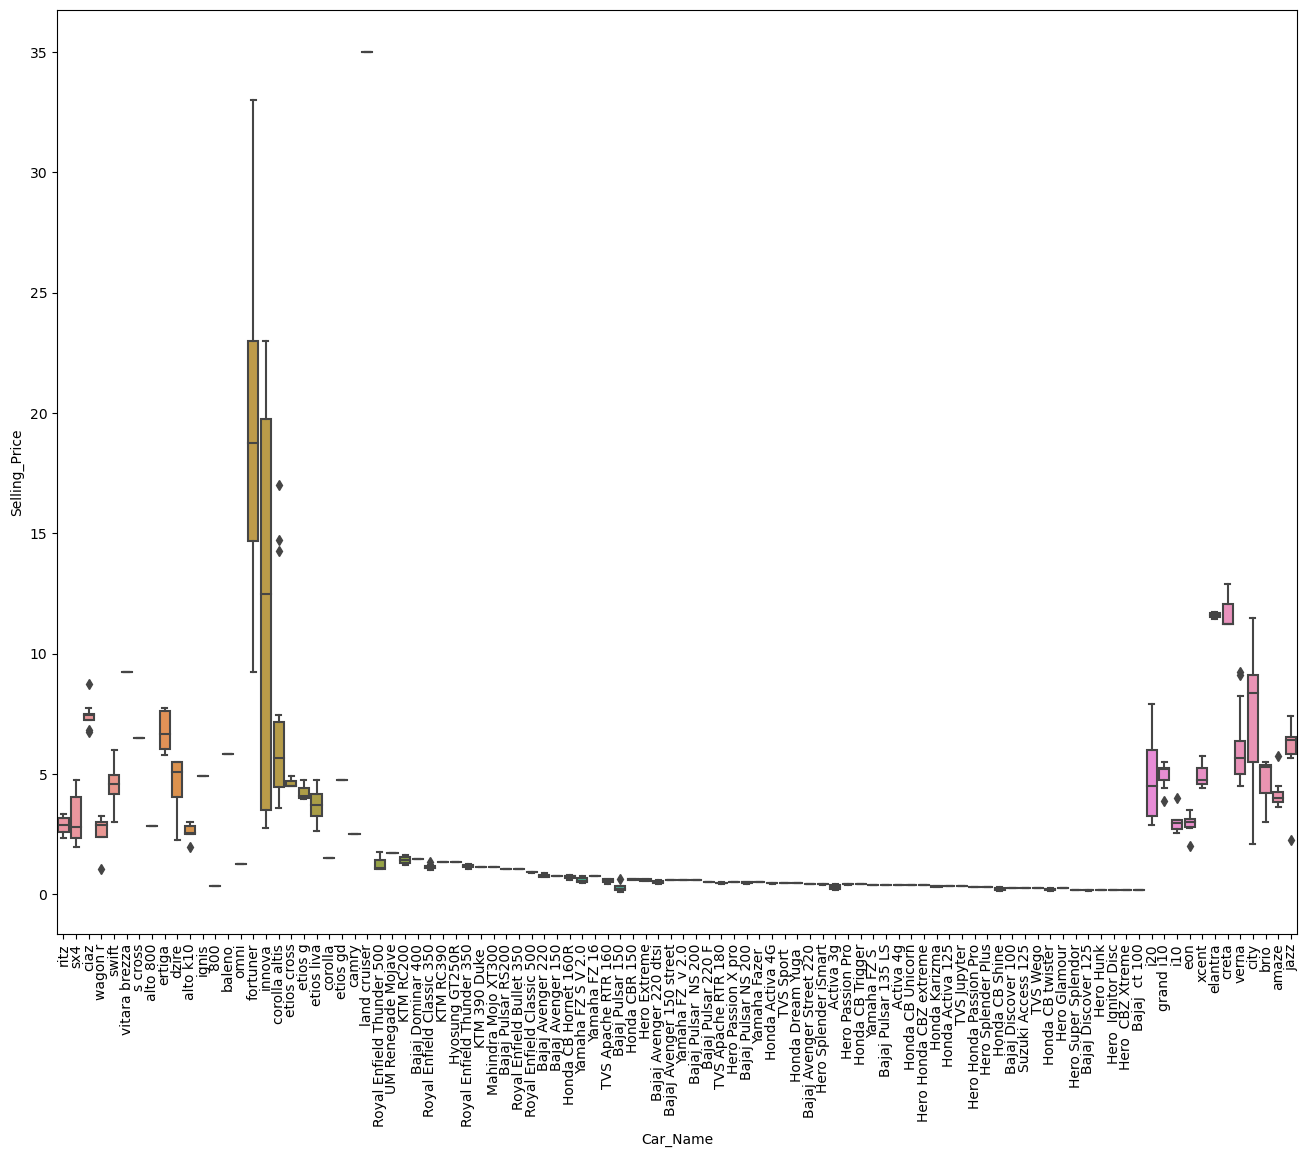

In [51]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Car_Name', y='Selling_Price', data=df)
plt.xticks(rotation=90)  
plt.show()

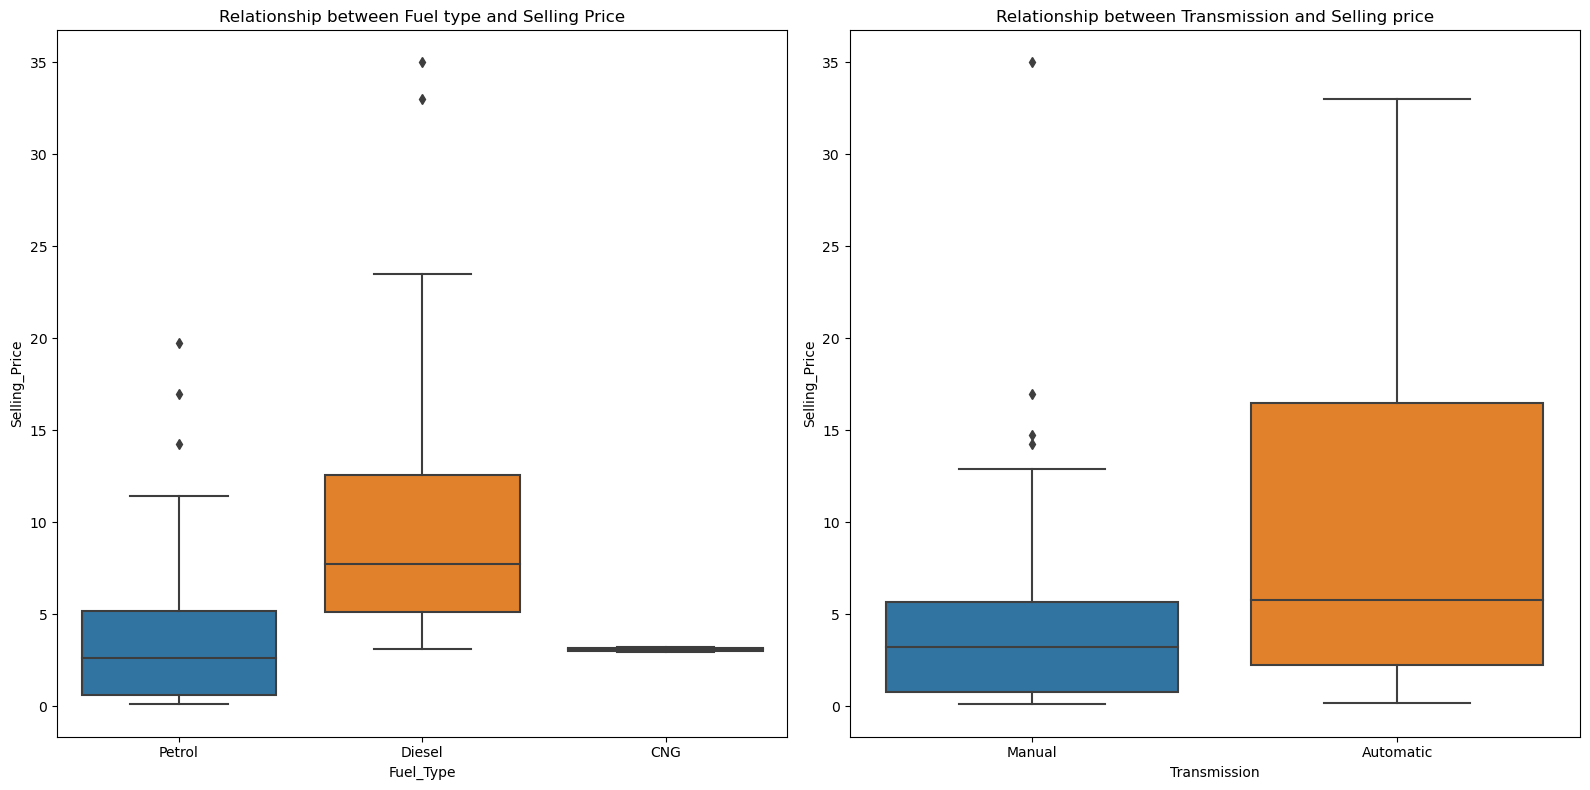

In [52]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()

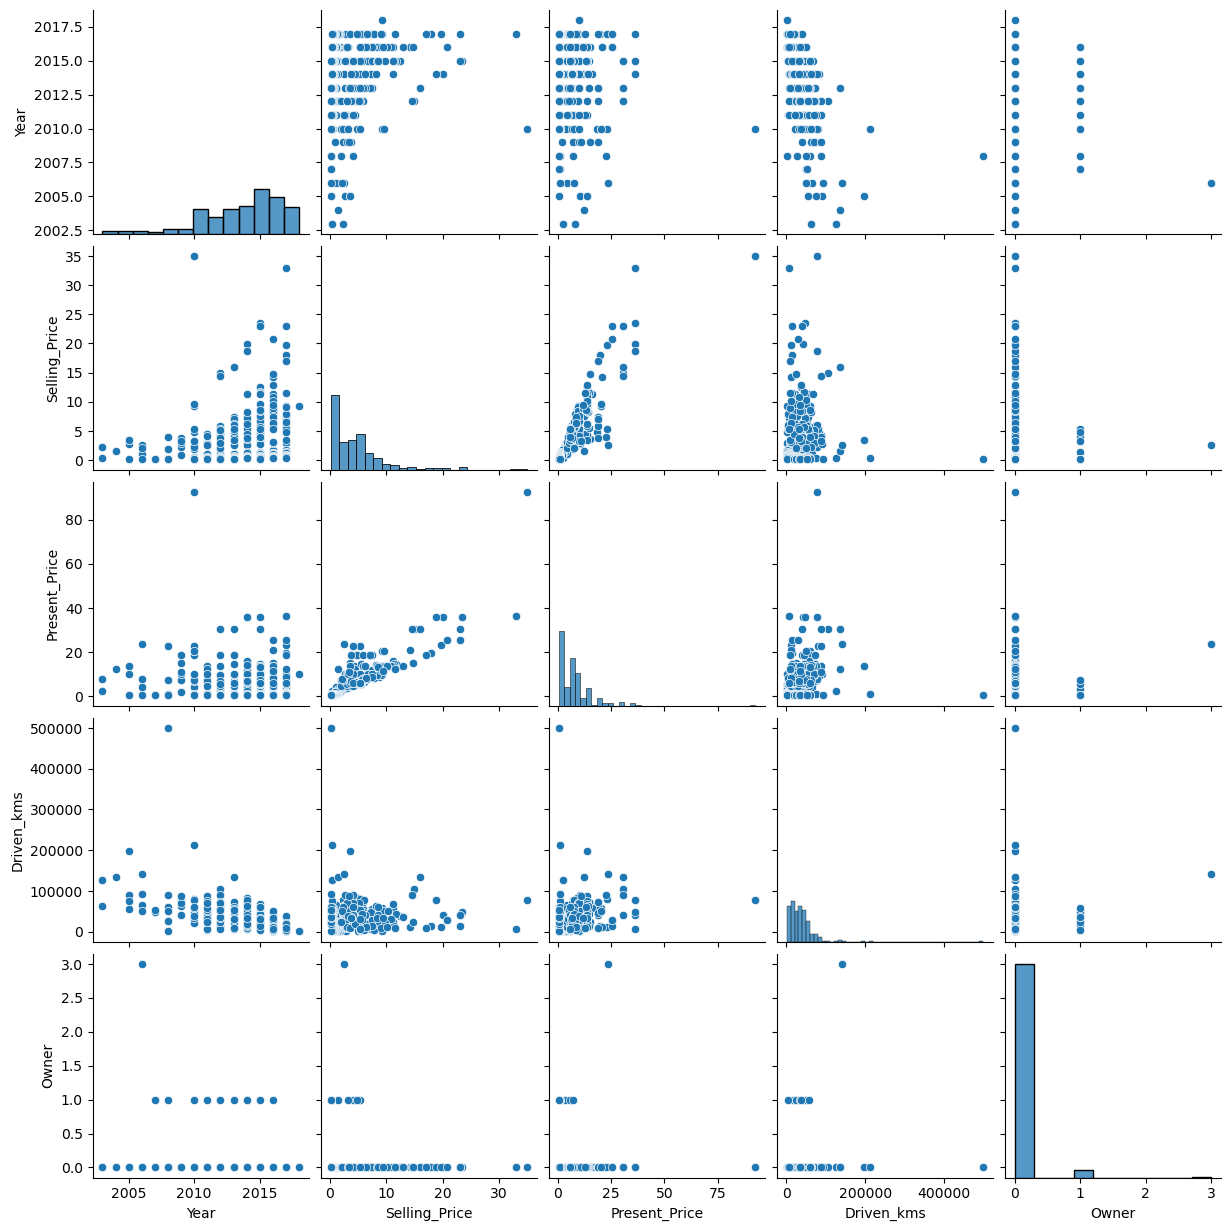

In [53]:
#multivariate
sns.pairplot(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_808\2094580623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

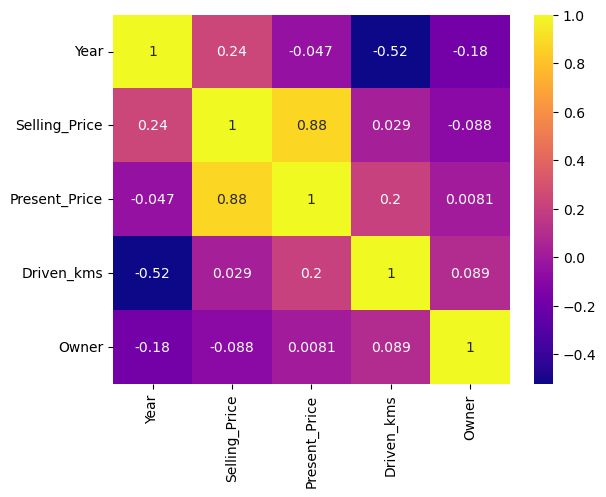

In [54]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [55]:
df.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [56]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [57]:
df['Transmission'].replace({'Manual': 0, 'Automatic': 1}, inplace=True)

In [58]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [59]:
df['Selling_type'].replace({'Dealer': 0, 'Individual': 1}, inplace=True)

In [60]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [61]:
df['Fuel_Type'].replace({'Petrol': 0, 'Diesel': 1,'CNG':3}, inplace=True)

In [62]:
df = pd.get_dummies(df, columns=['Car_Name'], prefix='Cars')

In [66]:
for i in df.columns:
    print(i)

Year
Selling_Price
Present_Price
Driven_kms
Fuel_Type
Selling_type
Transmission
Owner
Cars_800
Cars_Activa 3g
Cars_Activa 4g
Cars_Bajaj  ct 100
Cars_Bajaj Avenger 150
Cars_Bajaj Avenger 150 street
Cars_Bajaj Avenger 220
Cars_Bajaj Avenger 220 dtsi
Cars_Bajaj Avenger Street 220
Cars_Bajaj Discover 100
Cars_Bajaj Discover 125
Cars_Bajaj Dominar 400
Cars_Bajaj Pulsar  NS 200
Cars_Bajaj Pulsar 135 LS
Cars_Bajaj Pulsar 150
Cars_Bajaj Pulsar 220 F
Cars_Bajaj Pulsar NS 200
Cars_Bajaj Pulsar RS200
Cars_Hero  CBZ Xtreme
Cars_Hero  Ignitor Disc
Cars_Hero Extreme
Cars_Hero Glamour
Cars_Hero Honda CBZ extreme
Cars_Hero Honda Passion Pro
Cars_Hero Hunk
Cars_Hero Passion Pro
Cars_Hero Passion X pro
Cars_Hero Splender Plus
Cars_Hero Splender iSmart
Cars_Hero Super Splendor
Cars_Honda Activa 125
Cars_Honda Activa 4G
Cars_Honda CB Hornet 160R
Cars_Honda CB Shine
Cars_Honda CB Trigger
Cars_Honda CB Unicorn
Cars_Honda CB twister
Cars_Honda CBR 150
Cars_Honda Dream Yuga 
Cars_Honda Karizma
Cars_Hyosung GT

In [71]:
for i in df.columns:
    print(i, ':' ,df[i].dtypes)

Year : int64
Selling_Price : float64
Present_Price : float64
Driven_kms : int64
Fuel_Type : int64
Selling_type : int64
Transmission : int64
Owner : int64
Cars_800 : uint8
Cars_Activa 3g : uint8
Cars_Activa 4g : uint8
Cars_Bajaj  ct 100 : uint8
Cars_Bajaj Avenger 150 : uint8
Cars_Bajaj Avenger 150 street : uint8
Cars_Bajaj Avenger 220 : uint8
Cars_Bajaj Avenger 220 dtsi : uint8
Cars_Bajaj Avenger Street 220 : uint8
Cars_Bajaj Discover 100 : uint8
Cars_Bajaj Discover 125 : uint8
Cars_Bajaj Dominar 400 : uint8
Cars_Bajaj Pulsar  NS 200 : uint8
Cars_Bajaj Pulsar 135 LS : uint8
Cars_Bajaj Pulsar 150 : uint8
Cars_Bajaj Pulsar 220 F : uint8
Cars_Bajaj Pulsar NS 200 : uint8
Cars_Bajaj Pulsar RS200 : uint8
Cars_Hero  CBZ Xtreme : uint8
Cars_Hero  Ignitor Disc : uint8
Cars_Hero Extreme : uint8
Cars_Hero Glamour : uint8
Cars_Hero Honda CBZ extreme : uint8
Cars_Hero Honda Passion Pro : uint8
Cars_Hero Hunk : uint8
Cars_Hero Passion Pro : uint8
Cars_Hero Passion X pro : uint8
Cars_Hero Splender Plu

In [75]:
df.head(1)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Cars_800,Cars_Activa 3g,...,Cars_land cruiser,Cars_omni,Cars_ritz,Cars_s cross,Cars_swift,Cars_sx4,Cars_verna,Cars_vitara brezza,Cars_wagon r,Cars_xcent
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
#Model Building
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [77]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)


In [78]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(xtrain)

x_test_scaled = scaler.transform(xtest)


In [81]:
#sklearn linear regression

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

model=lr.fit(x_train_scaled,ytrain)

y_pred_test=model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

r2_test = r2_score(ytest,y_pred_test)
r2_train = r2_score(ytrain,y_pred_train)

rmse_train = np.sqrt(mean_squared_error(ytrain,y_pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,y_pred_test))

print(r2_test,r2_train,rmse_train,rmse_test)

-7.534244784281737e+24 0.9497715562544132 1.1595737974084719 13267463327457.314


In [90]:
#Ridge
from sklearn.linear_model import Ridge,Lasso,ElasticNet
x = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state = 1)

r = Ridge()

r.fit(xtrain,ytrain)
y_pred_test = r.predict(xtest)
y_pred_train = r.predict(xtrain)

r2_train = r2_score(ytrain,y_pred_train)
r2_test  = r2_score(ytest,y_pred_test)

rmse_test = np.sqrt(mean_squared_error(ytest,y_pred_test))
rmse_train = np.sqrt(mean_squared_error(ytrain,y_pred_train))

print(r2_test,r2_train,rmse_train,rmse_test)

0.8656025679407454 0.9371409495316981 1.3363597843031318 1.6209088141486527


In [92]:
#Lasso

l = Lasso()

l.fit(xtrain,ytrain)
y_pred_test = r.predict(xtest)
y_pred_train = r.predict(xtrain)

r2_train = r2_score(ytrain,y_pred_train)
r2_test  = r2_score(ytest,y_pred_test)

rmse_test = np.sqrt(mean_squared_error(ytest,y_pred_test))
rmse_train = np.sqrt(mean_squared_error(ytrain,y_pred_train))

print(r2_test,r2_train,rmse_train,rmse_test)


0.8656025679407454 0.9371409495316981 1.3363597843031318 1.6209088141486527


In [93]:
#elastic net

elastic_net = ElasticNet()
elastic_net.fit(xtrain, ytrain)

y_pred_train_en = elastic_net.predict(xtrain)
y_pred_test_en = elastic_net.predict(xtest)

r2_train = r2_score(ytrain, y_pred_train_en)
r2_test = r2_score(ytest, y_pred_test_en)

train_mse_en = mean_squared_error(ytrain, y_pred_train_en)
test_mse_en = mean_squared_error(ytest, y_pred_test_en)

rmse_train = np.sqrt(train_mse_en)
rmse_test = np.sqrt(test_mse_en)

print(r2_test,r2_train,rmse_train,rmse_test)

0.8351210963226035 0.8497921121634795 2.0657885178469795 1.7953356056551033


In [95]:
#Randomforest regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xtrain, ytrain)

y_pred_train_rf = rf_model.predict(xtrain)
y_pred_test_rf = rf_model.predict(xtest)

r2_train = r2_score(ytrain, y_pred_train_rf)
r2_test = r2_score(ytest, y_pred_test_rf)

train_mse_rf = mean_squared_error(ytrain, y_pred_train_rf)
test_mse_rf = mean_squared_error(ytest, y_pred_test_rf)

rmse_train = np.sqrt(train_mse_rf)
rmse_test = np.sqrt(test_mse_rf)

print(r2_test,r2_train,rmse_train,rmse_test)

0.9062417763179502 0.9869050468168816 0.6099461081580427 1.3538413792279698
